In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
colNames = ['timeStamp', 'ganglionTime', 'c1' ,'c2', 'c3', 'c4', 'a1', 'a2', 'a3']
d = pd.read_csv("../Data/record.csv_2018-11-1_17-11-27.csv", sep=',', names=colNames)

In [81]:
d.tail()

,timeStamp,ganglionTime,c1,c2,c3,c4,a1,a2,a3
1163,113.54582118000053,22.0,0.006199,0.008693,0.014644,0.019954,0.000096,-0.000016,-0.000976
1164,113.54665341200052,23.0,-0.002261,0.011104,0.043772,0.039101,0.000096,-0.000016,-0.000976
1165,113.54677439900024,24.0,0.015464,0.009395,0.007484,0.014219,0.000096,-0.000016,-0.000976
1166,113.63491350300046,25.0,0.027154,0.016753,-0.018527,-0.004701,0.000096,-0.000016,-0.000976
1167,113.63530973199977,26.0,0.008114,0.011734,0.017022,0.019932,0.000096,-0.000016,-0.000976


In [9]:
d.shape

(1168, 9)

In [47]:
d[250:251]

,timeStamp,ganglionTime,c1,c2,c3,c4,a1,a2,a3
250,57.29710487700049,40.0,0.023558,0.015638,-0.015762,-0.002728,0.0,0.0,0.0


In [48]:
t = d.timeStamp

In [55]:
eeg = np.array(d.ix[0:, 2:6])
eeg = eeg[250:,]

In [56]:
eeg

array([[ 0.02355763,  0.01563839, -0.01576181, -0.00272826],
       [ 0.03560572,  0.0146361 , -0.03660053, -0.01896316],
       [ 0.05536174,  0.02099954, -0.07803862, -0.03702688],
       ..., 
       [ 0.01546449,  0.00939463,  0.00748354,  0.0142191 ],
       [ 0.02715354,  0.01675288, -0.01852746, -0.00470105],
       [ 0.00811371,  0.01173394,  0.01702215,  0.0199318 ]])

In [57]:
eeg.shape

(918, 4)

In [73]:
eeg = eeg[350:, :]

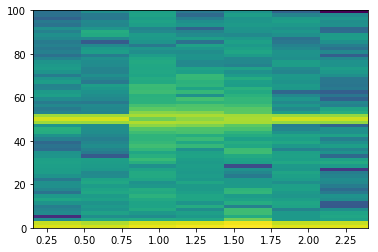

In [74]:
_ = plt.specgram(eeg[:, 0], NFFT=128, Fs=200, noverlap=64)

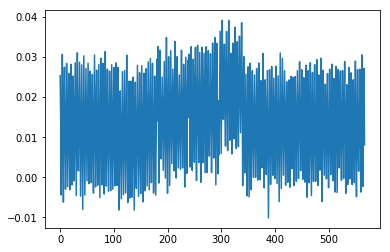

In [75]:
plt.plot(eeg[:, 0])

In [76]:
from scipy import signal

In [77]:
# filter from 5 to 35 Hz, helps remove 60Hz noise and replicates paper
## also helps remove the DC line noise (baseline drift)
## 125 is half the sampling rate (250Hz/2)
b, a = signal.butter(4, (2.0/125, 35.0/125), btype='bandpass') 
b, a

(array([ 0.01222321,  0.        , -0.04889285,  0.        ,  0.07333928,
         0.        , -0.04889285,  0.        ,  0.01222321]),
 array([  1.        ,  -5.71974179,  14.41372236, -21.04755049,
         19.59013879, -11.93007722,   4.63594027,  -1.04851038,   0.10608002]))

In [78]:
eeg_f = signal.lfilter(b, a, eeg, axis=0)

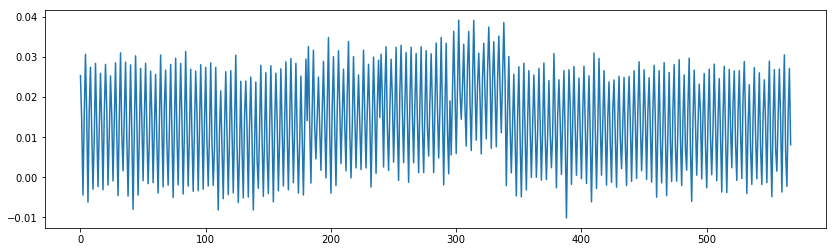

In [80]:
plt.figure(figsize=(14, 4))
plt.plot(eeg[:, 0]) ## raw data

In [82]:
from sklearn.decomposition import FastICA

In [83]:
ica = FastICA()
sources = ica.fit_transform(eeg_f)
means = ica.mean_.copy()
mixing = ica.mixing_.copy()

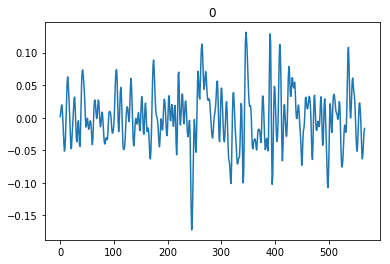

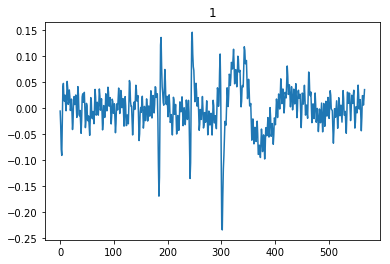

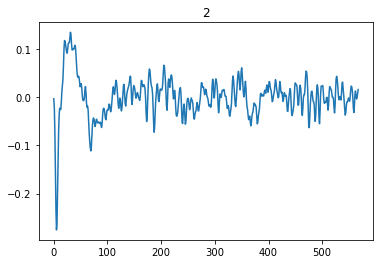

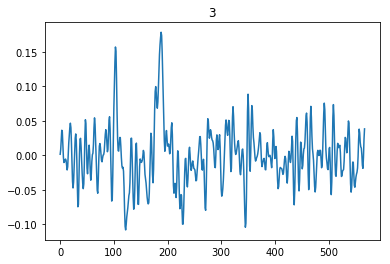

In [84]:
## look at the plots to find the eyeblink component
## TODO: make a more robust eyeblink component finder
for i in range(ica.components_.shape[0]):
    plt.figure()
    plt.plot(sources[:8500, i])
    plt.title(i)

In [85]:
eye_blinks_ix = 3

In [86]:
mixing[:, eye_blinks_ix] = 0 # setting eyeblink component to 0
eeg_ff = sources.dot(mixing.T) + means # this is the ICA inverse transform

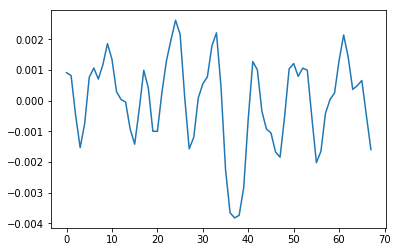

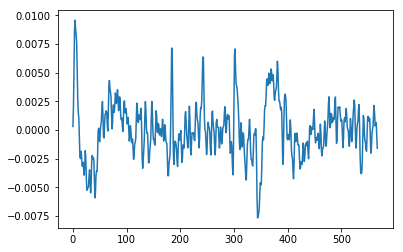

In [87]:
plt.figure()
plt.plot(eeg_f[500:9000, 0])

plt.figure()
plt.plot(eeg_ff[:8500, 0])